In [2]:
from rembg import remove
from PIL import Image

In [28]:
input_path = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output_path = "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/5.png"
input_path2 = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output2= "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/7.png"

In [5]:
input = Image.open(input_path)
output = remove(input)

output.save(output_path)

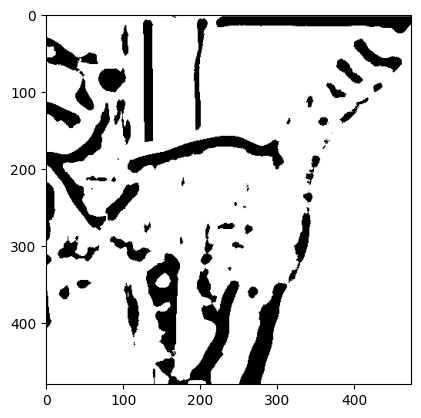

In [51]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image_path = "image_test/chien.jpeg"
pil_image = Image.open(input_path).convert('L')

img = np.array(pil_image)

img_blurred = cv2.medianBlur(img, 21)
img_thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 10)

pil_image_processed = Image.fromarray(img_thresh)

plt.imshow(pil_image_processed, cmap='gray')
plt.show()

In [52]:
## kernel

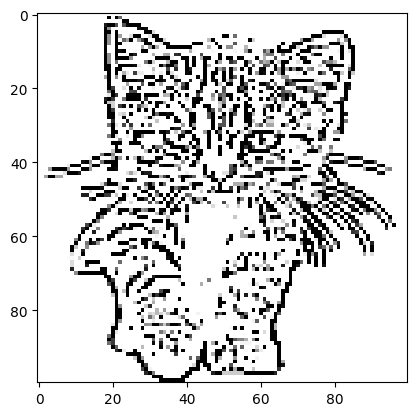

In [76]:
#image_path = "cat_dataset_1/images.cv_yfaip1vvxytk4pzkv6rhb/data/train/animal animal_faces cat cat_face/0AM9O53MDBX5.jpg"

input = cv2.imread(output2)

image = remove(input)
plt.imshow(image, cmap='gray')

img_blurred = cv2.GaussianBlur(image,(5,5),15)
gray_img = cv2.cvtColor(img_blurred , cv2.COLOR_BGR2GRAY)
img_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

# To PIL Image
image = cv2.resize(img_thresh, (100, 100))
image = Image.fromarray(image)
image = np.array(image)

plt.imshow(image, cmap='gray')

In [80]:
filters = {
    ' ': np.array([[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]]),
    '|': np.array([[-1, 2, -1],
                   [-1, 2, -1],
                   [-1, 2, -1]]),
    '-': np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]]),
    '"': np.array([[2, 2, 2],
                   [-1, -1, -1],
                   [-1, -1, -1]]),
    '_': np.array([[-1, -1, -1],
                   [-1, -1, -1],
                   [2, 2, 2]]),
    '/': np.array([[-1, -1, 2],
                   [-1, 2, -1],
                   [2, -1, -1]]),
    '\\': np.array([[2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]]),
    '^': np.array([[-1, 2, -1],
                   [2, -1, 2],
                   [-1, -1, -1]]),
    '>': np.array([[-1, 2, -1],
                   [-1, -1, 2],
                   [-1, 2, -1]]),
    '<': np.array([[-1, 2, -1],
                   [2, -1, -1],
                   [-1, 2, -1]]),
    '+': np.array([[-1.25, 1, -1.25],
                   [1, 1, 1],
                   [-1.25, 1, -1.25]]),
    'X': np.array([[1, -1.25, 1],
                   [-1.25, 1, -1.25],
                   [1, -1.25, 1]]),
    'o': np.array([[-1, 1.25, -1],
                   [1.25, -1, 1.25],
                   [-1, 1.25, -1]]),
    'O': np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]]),
    'L': np.array([[1, -1.25, -1.25],
                   [1, -1.25, -1.25],
                   [1, 1, 1]]),
    'J': np.array([[-1.25, -1.25, 1],
                   [-1.25, -1.25, 1],
                   [1, 1, 1]]),
    'T': np.array([[1, 1, 1],
                   [-1.25, 1, -1.25],
                   [-1.25, 1, -1.25]]),
    'U': np.array([[1, -3.5, 1],
                   [1, -3.5, 1],
                   [1, 1, 1]]),
    '7': np.array([[1, 1, 1],
                   [-1.25, -1.25, 1],
                   [-1.25, -1.25, 1]]),
    'Z': np.array([[1, 1, -1.25],
                   [-1.25, 1, -1.25],
                   [-1.25, 1, 1]]),
    'S': np.array([[-1.25, 1, 1],
                   [-1.25, 1, -1.25],
                   [1, 1, -1.25]]),
    'V': np.array([[1, -1.25, 1],
                   [1, -1.25, 1],
                   [-1.25, 1, -1.25]]),
    'A': np.array([[-2, 1, -2],
                   [1, -2, 1],
                   [1, 1, 1]]),
    'H': np.array([[1, -3.5, 1],
                   [1, 1, 1],
                   [1, -3.5, 1]]),
    'K': np.array([[1, -2, 1],
                   [1, 1, -2],
                   [1, -2, 1]]),
    'C': np.array([[1, 1, -1.25],
                   [1, -1.25, -1.25],
                   [1, 1, -1.25]]),
    'Y': np.array([[1.25, -1, 1.25],
                   [-1, 1.25, -1],
                   [-1, 1.25, -1]])
}

In [81]:
image.shape

(100, 100)

In [84]:
width, height = image.shape


# padding = 0
# border_color = [0, 0, 0]
# padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=border_color)

striding_factor = 2  # Adjust this as needed

filters_result = []
for i, filter in enumerate(filters.values()):
    if i % striding_factor == 0:
        filtered_image = cv2.filter2D(image, -1, filter)
        filters_result.append(filtered_image)

filters_result = np.array(filters_result)

max_indices = np.argmax(filters_result, axis=0)
ascii_image = np.empty((height, width), dtype=str)

filter_chars = list(filters.keys())
print(image.shape)
for i in range(height - 10):
    for j in range(width - 10):
        ascii_image[i, j] = filter_chars[max_indices[i, j]]

for row in ascii_image:
    print("".join(row))

(100, 100)
                  ||||||                                                                  
                  ----_>||                                                                
                 /||||/+_>|||                                                             
                 >o"-------_"|/                                                           
                 /|||||||||--<"|/                                           ||||||||      
                 /^_><"//||||-_>||               ||||o/                  |||"^----_"|     
                 /^<_^_<|">_||--_"|/         /|||"---X> |||/          /||"^---||||-_"|    
                 /^__|"_-----<||-->|/    ||||"-_"|||||| --->     |||/||"^--|||||||"^<"    
                 /^_/---||||--_"|--_|||||"^--_|-_"||"_>/|||X    |"__><--||||||"--_"||||   
                 /^_/||||/o>||-------------||-X----^--X>|"/ /|||/|||"-|||<_----|||<"^_"   
                 /^_/^--_||"---||/||||||||->o/oX|||^-X>^--> ><><-----|+^--|||||

In [68]:
a = np.array([[1, 1, -1.2],
                   [1, -1.2, -1.2],
                   [1, 1, -1.2]])

np.sum(a)

0.20000000000000018